In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('max_colwidth',100)

In [3]:
#load files

customers=pd.read_csv('C:/Users/Dell/Desktop/kaggle_dataset/B_E_commerce_dataset/data/olist_customers_dataset.csv')
geolocation=pd.read_csv('C:/Users/Dell/Desktop/kaggle_dataset/B_E_commerce_dataset/data/olist_geolocation_dataset.csv')
order_items=pd.read_csv('C:/Users/Dell/Desktop/kaggle_dataset/B_E_commerce_dataset/data/olist_order_items_dataset.csv')
order_payment=pd.read_csv('C:/Users/Dell/Desktop/kaggle_dataset/B_E_commerce_dataset/data/olist_order_payments_dataset.csv')
order_reviews=pd.read_csv('C:/Users/Dell/Desktop/kaggle_dataset/B_E_commerce_dataset/data/olist_order_reviews_dataset.csv')
orders=pd.read_csv('C:/Users/Dell/Desktop/kaggle_dataset/B_E_commerce_dataset/data/olist_orders_dataset.csv')
products=pd.read_csv('C:/Users/Dell/Desktop/kaggle_dataset/B_E_commerce_dataset/data/olist_products_dataset.csv')
sellers=pd.read_csv('C:/Users/Dell/Desktop/kaggle_dataset/B_E_commerce_dataset/data/olist_sellers_dataset.csv')
translation=pd.read_csv('C:/Users/Dell/Desktop/kaggle_dataset/B_E_commerce_dataset/data/product_category_name_translation.csv')

In [4]:
#merge tables

order_merge_list=[order_items,order_payment,order_reviews]
for i in order_merge_list:
    orders=pd.merge(orders,i,on='order_id',how='left')

orders=pd.merge(orders,products,on='product_id',how='left')
orders_full=pd.merge(orders,translation,on='product_category_name',how='left')
sellers_geo=pd.merge(sellers,geolocation,left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix')
customers_geo=pd.merge(customers,geolocation,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix')

In [5]:
orders_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [9]:
#convert date to datetype

date_cols=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date' ,'order_estimated_delivery_date','shipping_limit_date','review_creation_date','review_answer_timestamp']
for item in date_cols:
    orders_full[item]=pd.to_datetime(orders_full[item])
orders_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   order_item_id                  118310 non-null  float64       
 9   product_id                     118310 non-null  object        
 10  seller_id                      118310 non-null  object        
 11  

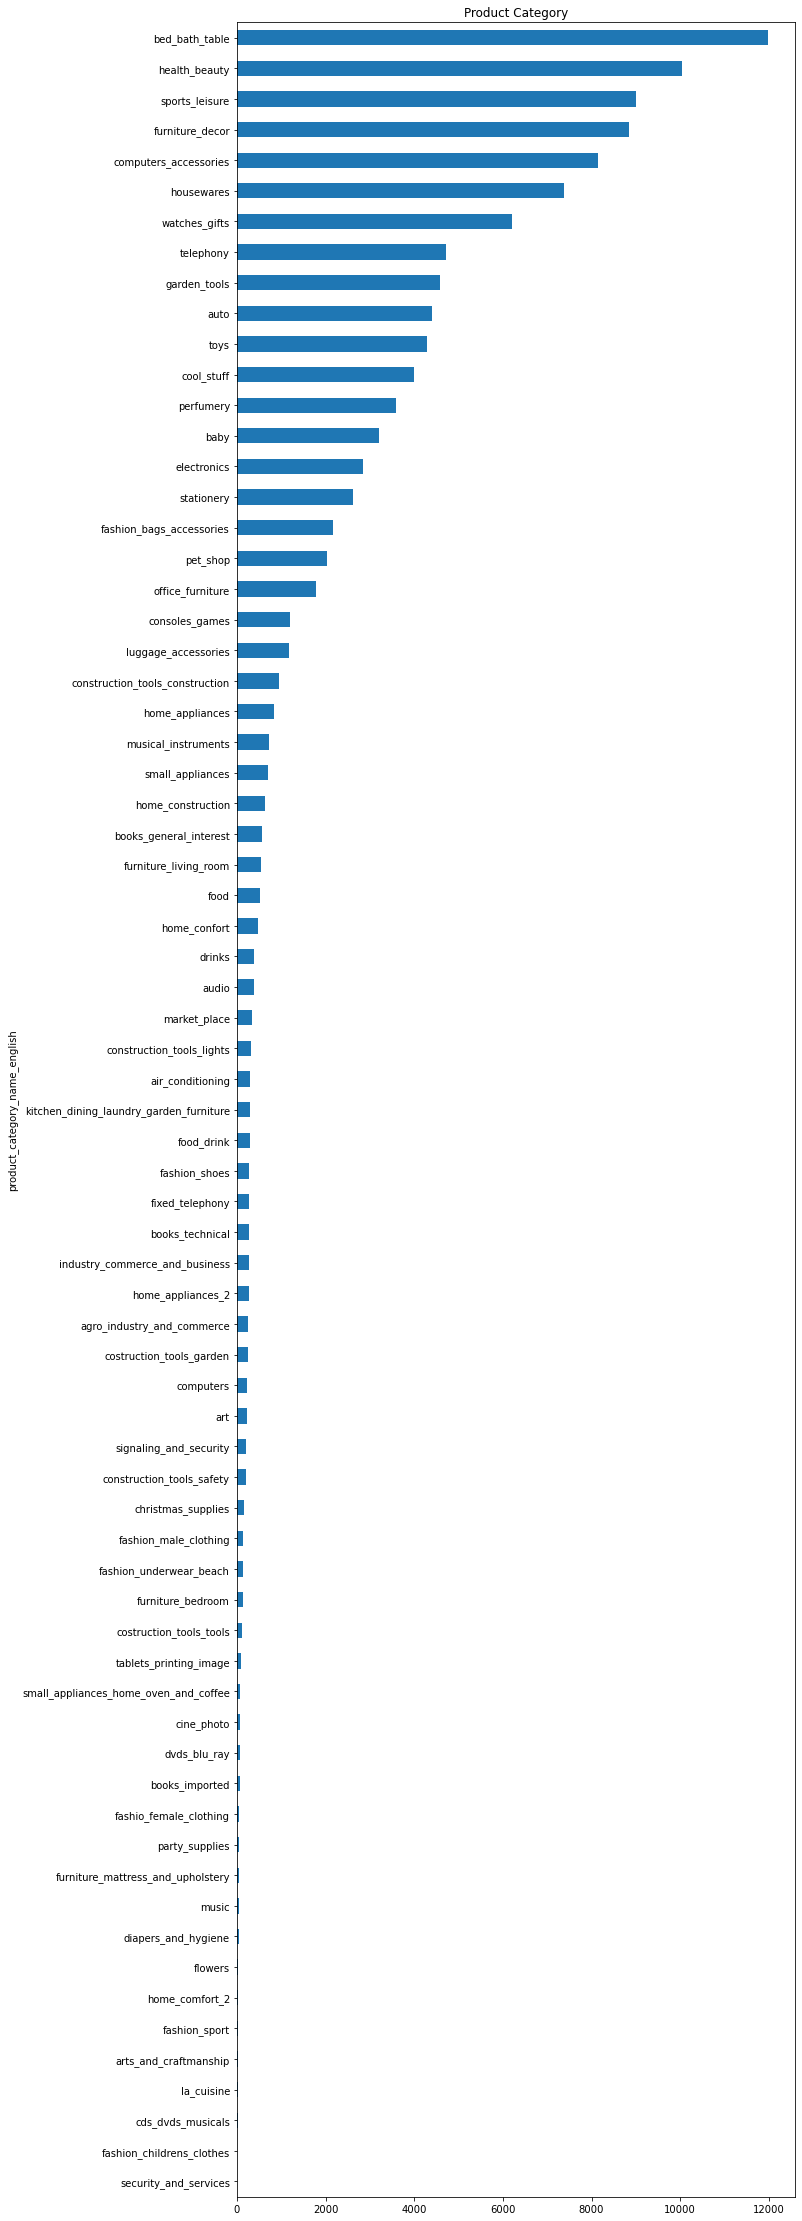

In [11]:
#plot quantity sold in different kinds of goods
plt.subplot()
product_counts=orders_full.groupby(['product_category_name_english']).size().sort_values()
product_counts.plot(kind='barh',figsize=(10,40),title='Product Category')
plt.style.use('ggplot')

Text(0.5, 1.0, 'Payment mean')

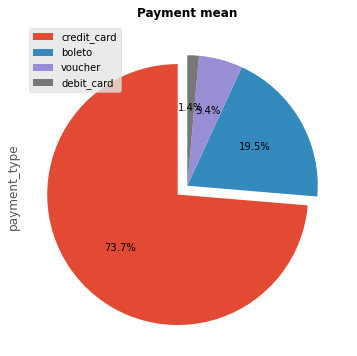

In [17]:
#plot mean of payment analysis

plt.subplot()
payment_counts=orders_full['payment_type'][orders_full['payment_type']!='not_defined'].value_counts()
explode=[0.1,0,0,0]
payment_counts.plot(kind="pie",autopct='%1.1f%%',pctdistance=0.6,figsize=(6,6),explode=explode,startangle=90,labels=None,legend=True)
plt.title('Payment mean',fontweight='bold',size=12)

<AxesSubplot:xlabel='payment_installments', ylabel='Count'>

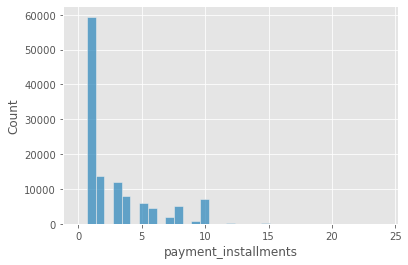

In [29]:
#plot installment payment
plt.subplots()
sns.histplot(orders_full['payment_installments'].dropna(),bins=35)

<AxesSubplot:title={'center':'Daily sells'}>

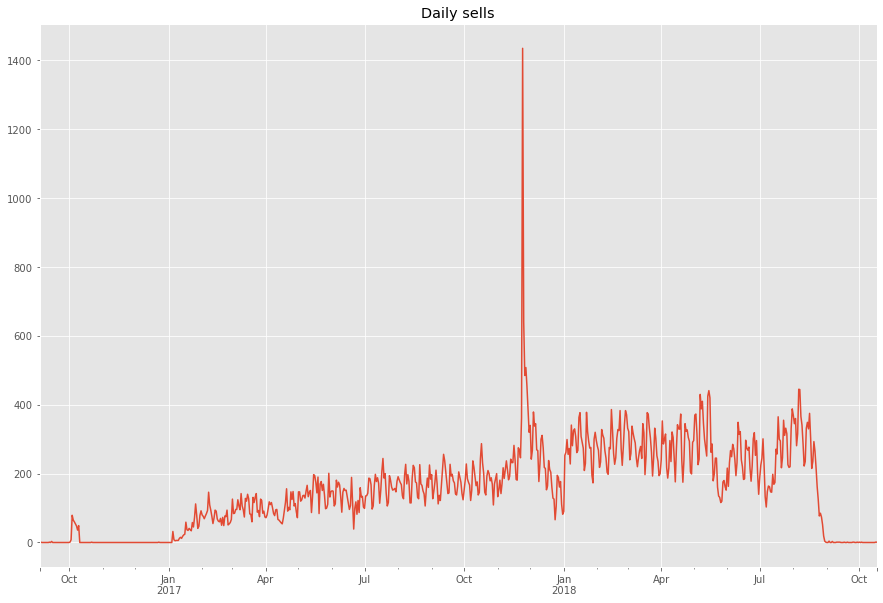

In [30]:
Daily_sells=orders_full['order_purchase_timestamp'].value_counts().resample('D').sum()
Daily_sells.plot(figsize=(15,10),title='Daily sells')

<AxesSubplot:title={'center':'Month_Amount'}, xlabel='order_purchase_timestamp'>

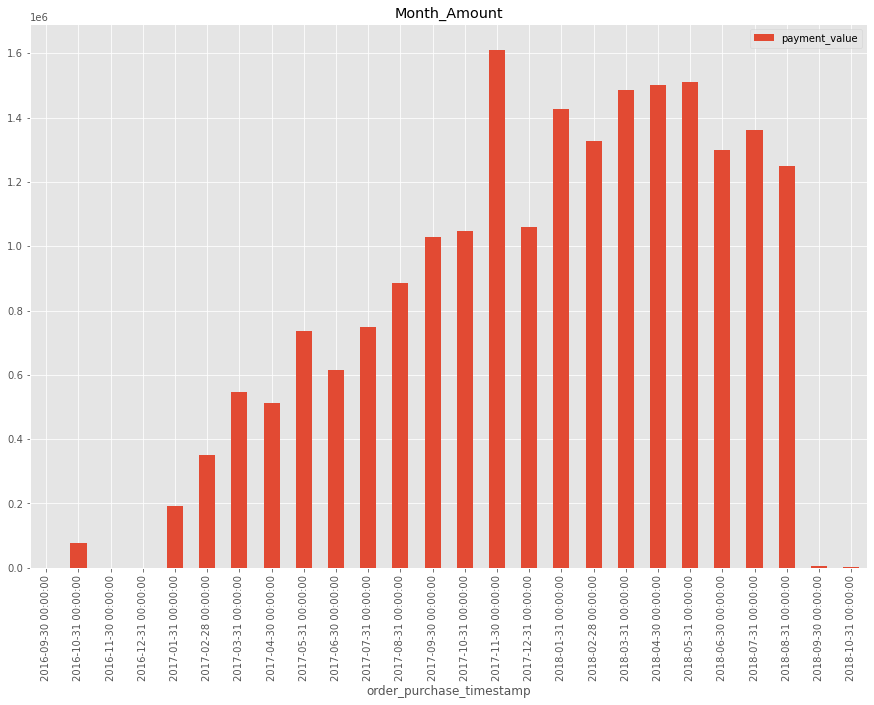

In [34]:
amount=orders_full.loc[:,['order_purchase_timestamp','payment_value']].set_index('order_purchase_timestamp').sort_index()

month_amount=amount.resample('M').sum()

month_amount.plot(kind='bar', figsize=(15,10),title='Month_Amount')

<ipython-input-40-b131407b9c65>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scores=score[seller_review['seller_id'].value_counts()>300]


<AxesSubplot:title={'center':'Review Scores Rank'}, ylabel='seller_id'>

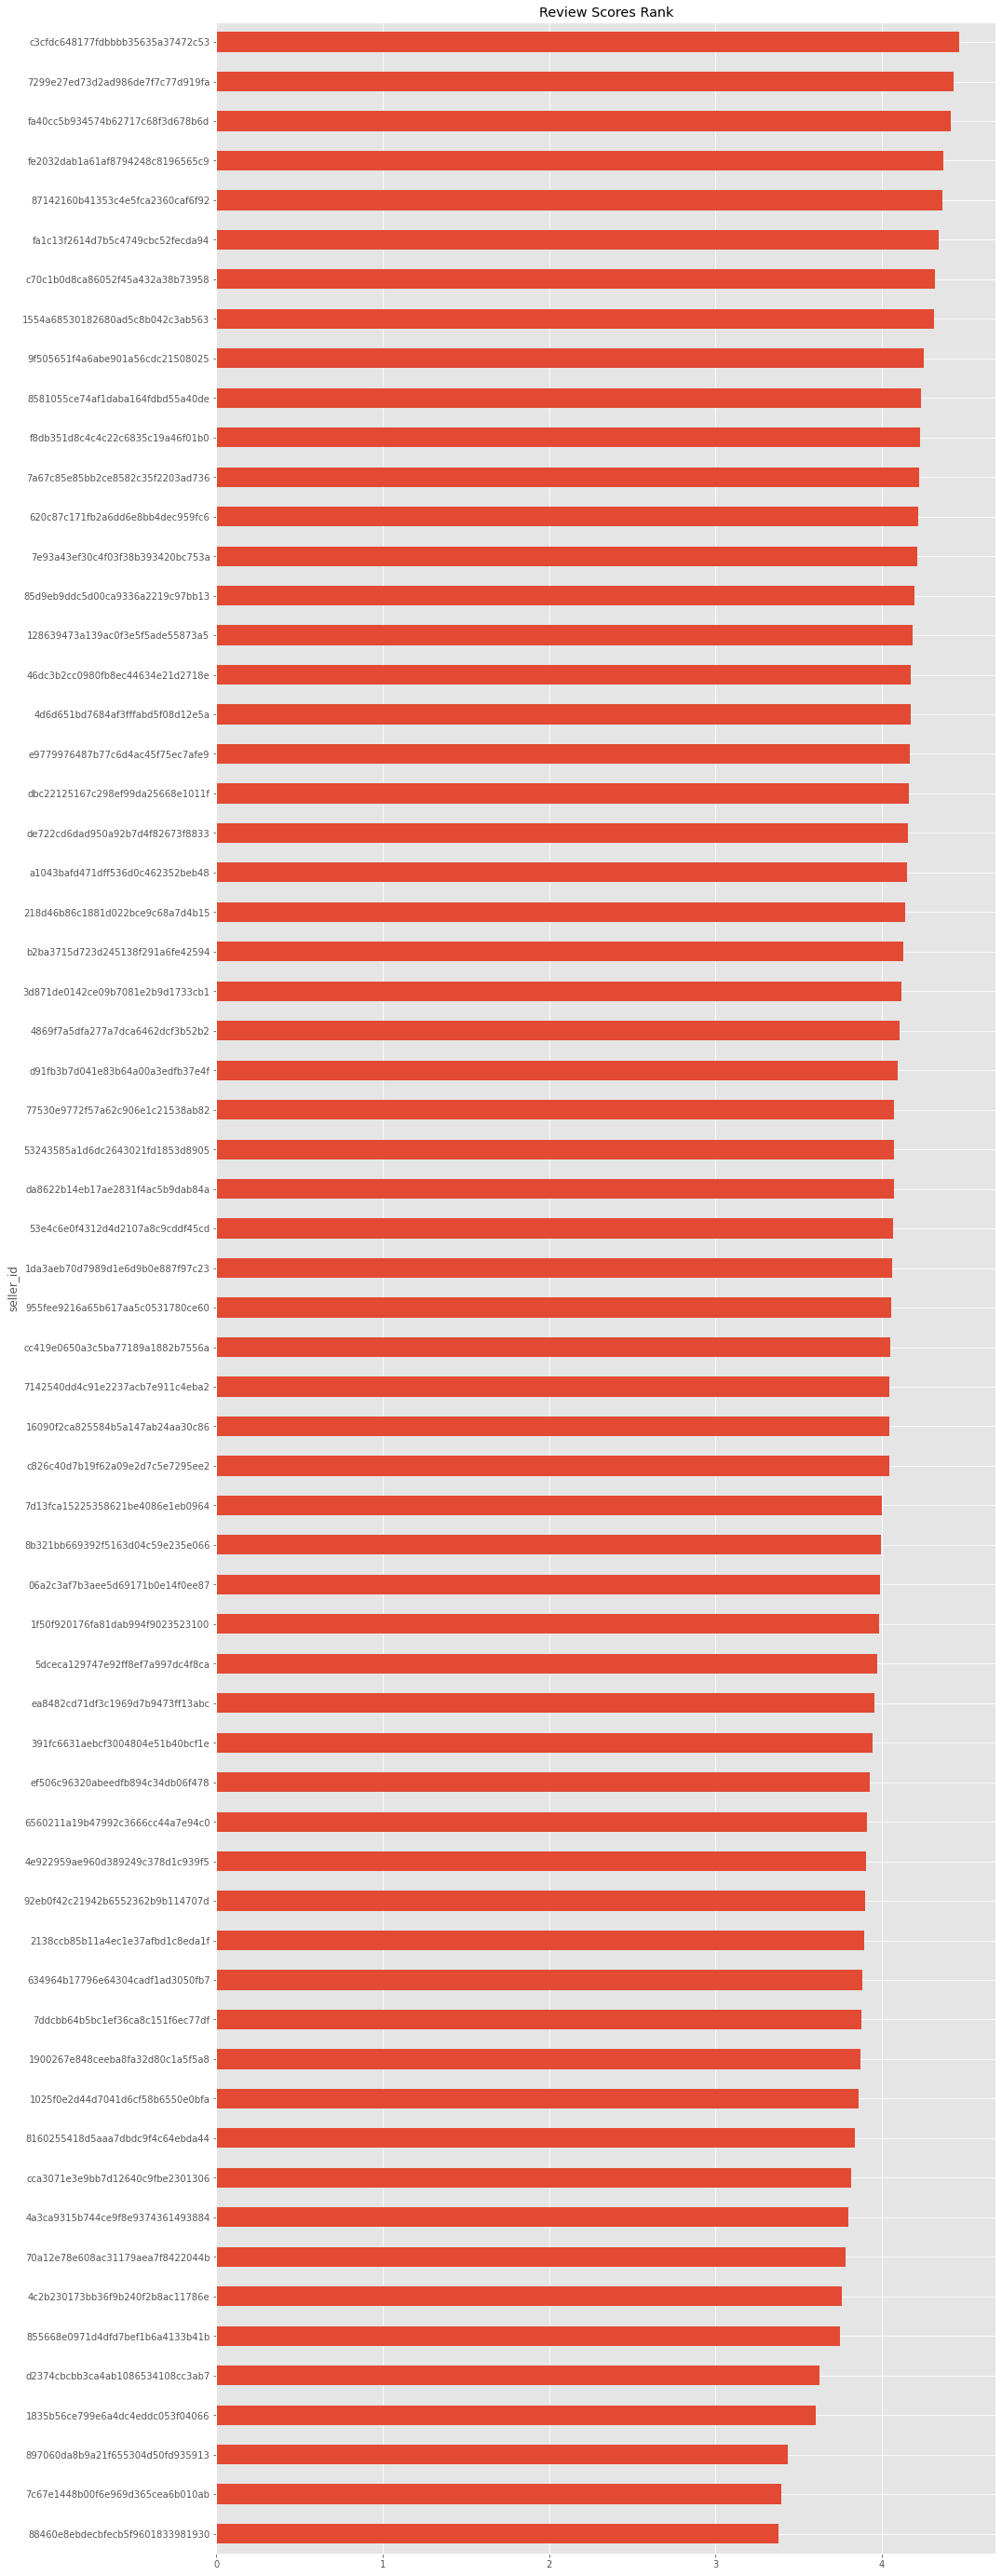

In [40]:

seller_review=orders_full.loc[:,['seller_id','review_score']]
score=seller_review.groupby(['seller_id']).mean()
scores=score[seller_review['seller_id'].value_counts()>300]

scores_sorted=scores.loc[:,'review_score'].sort_values()

plt.subplot()
scores_sorted.plot(kind='barh',figsize=(15,50),title="Review Scores Rank")



<AxesSubplot:title={'center':'Seller cites '}, ylabel='seller_city'>

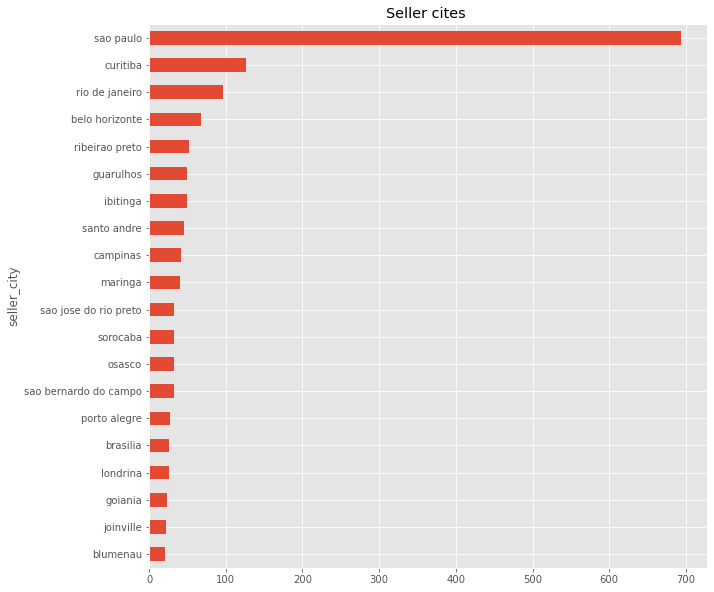

In [41]:
seller_cites=sellers_geo.groupby(['seller_id','seller_city']).size().sort_values()
seller_cites_counts=seller_cites.groupby(['seller_city']).size().sort_values()

seller_cites_counts.tail(20).plot(kind='barh',figsize=(10,10),title='Seller cites ')